In [1]:
""" To evaluate distances metrics, with common plotting and comparisons

First focusing on metrics that takei into acocunt directionallty
"""

' To evaluate distances metrics, with common plotting and comparisons\n\nFirst focusing on metrics that takei into acocunt directionallty\n'

### Load a dataaset to test with

In [1]:
import os
from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *

from pythonlib.dataset.dataset import Dataset
from pythonlib.dataset.analy import preprocessDat
from pythonlib.tools.pandastools import applyFunctionToAllRows, aggregGeneral, pivot_table
# import pickle
import pandas as pd
from pythonlib.dataset.plots import plot_beh_grid_grouping_vs_task


In [3]:
animal = "Red"
expt = "neuralprep7"

D = Dataset([])
D.load_dataset_helper(animal, expt)


Did not load data!!!
HERE0
Searching using this string:
/data2/analyses/database//*Red*neuralprep7*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/data2/analyses/database/BEH/*Red*neuralprep7*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/data2/analyses/database/BEH/Red-neuralprep7-formodeling-210513_103039
HERE1
----------------
Currently loading: /data2/analyses/database/BEH/Red-neuralprep7-formodeling-210513_103039
Loaded metadat:
{'sketchpad_edges': array([[-311.84, -224.8 ],
       [ 311.84,  429.6 ]]), 'metadat_probedat': {'sdate': 210501, 'edate': 210501, 'strokmodel_kind': None, 'strokmodel_tstamp': None, 'datecategories': {'210501': 1}, 'dates_for_summary': [], 'matchedstrokes': None, 'exptnames': ['neuralprep7'], 'tasknames_G1': [], 'tasknames_G2': [], 'tasknames_G3': [], 'description': '', 'finalized': True, 'good_expt': True, 'expt': 'neuralprep7', 'task_train_test': {'probe1_liketrain': 'train', 'p


### Care about ordering and directionality

In [85]:
from pythonlib.drawmodel.strokedists import distscalarStrokes


expect to get (ignoreing num max): 48
confidence 0.012807052953026254


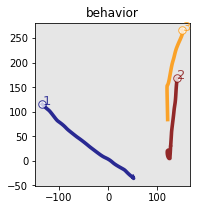

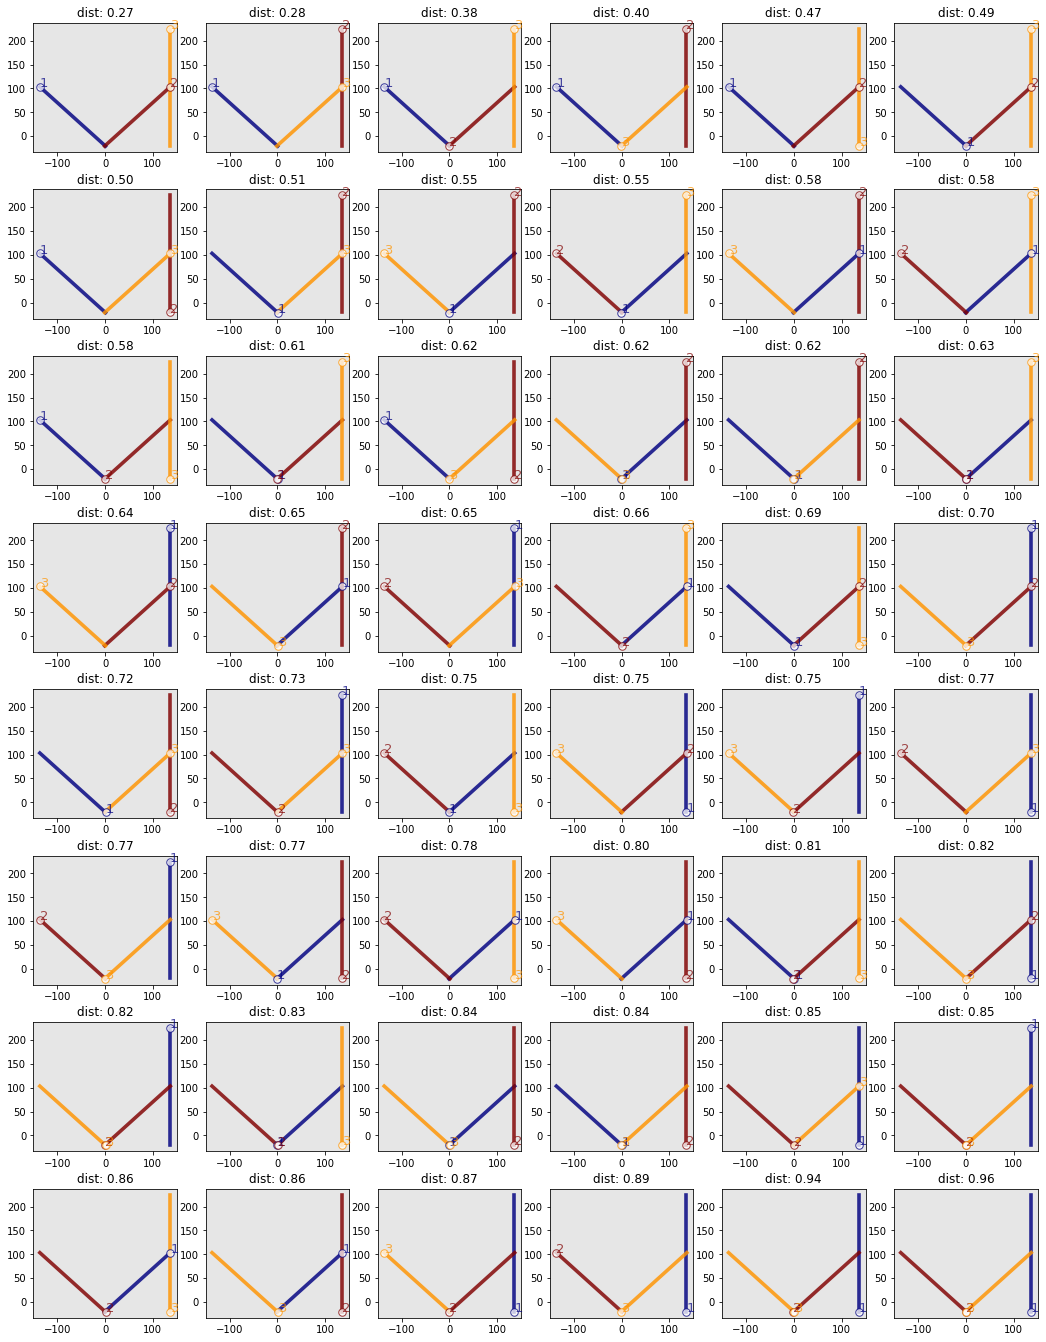

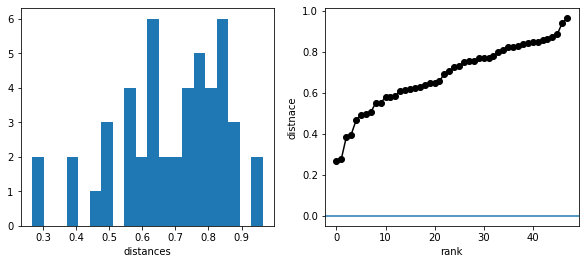

In [122]:
# Load a random trial
import random
ind = random.randrange(len(D.Dat))
# tasklist = D.analy_get_tasks_strongesteffect(GROUPING, GROUPING_LEVELS, v)
# print(tasklist)
# # --------------------- INPUT
# task = tasklist[-6]
# task = "mixture2_26-savedset-35-80204"

strokes_beh = D.Dat["strokes_beh"].values[ind]
strokes_task = D.Dat["strokes_task"].values[ind]

# #_--------------------------
# print(task)
# dftmp = D.Dat[D.Dat["character"]==task]
# inds = dftmp.index.tolist()
# titles = dftmp[GROUPING].values.tolist()
# D.plotMultTrials(inds, titles=titles)

# for strokes_task in dftmp["strokes_task"].values:
#     print(len(strokes_task))

# ##### Condition on plot rank efficiency + the sequence that it is aligned to 
# from pythonlib.drawmodel.strokePlots import plotDatStrokes

# fig, axes = plt.subplots(1, len(inds), figsize=(len(inds)*2, 2))
# for i, ax in zip(inds, axes.flatten()):
#     strokes_beh = D.Dat["strokes_beh"].values[i]
#     strokes_task = D.Dat["strokes_task"].values[i]


# Score distance between behavior and all permutations/reorderings of strokes_task.
# rank, S = rank_beh_out_of_all_possible_sequences(strokes_beh, strokes_task, return_chosen_task_strokes=True)
# #     print(rank)
# #     print(S)


############## INSET METHOD HERE
# # Method 1 - split segments
# from pythonlib.drawmodel.strokedists import scoreAgainstAllPermutations
# scoreAgainstAllPermutations(strokes_beh, strokes_task, plots=True);

# ## Method 2 - dtw, all timespoints
# func = lambda s1, s2: distscalarStrokes(s1, s2, ver="dtw_timepoints")
# scoreAgainstAllPermutations(strokes_beh, strokes_task, plots=True, distfunc=func);

from pythonlib.drawmodel.strokedists import distanceStroksMustBePaired

# # Method 3 - euclidian
# def dfunc(strokes1, strokes2):
#     return distanceStroksMustBePaired(strokes1, strokes2, ver='euclidian')
# scoreAgainstAllPermutations(strokes_beh, strokes_task, plots=True, distfunc=dfunc);
        
# # Method 4 - velocity
# def dfunc(strokes1, strokes2):
#     return distanceStroksMustBePaired(strokes1, strokes2, ver='euclidian_diffs')
# scoreAgainstAllPermutations(strokes_beh, strokes_task, plots=True, distfunc=dfunc);

# Method 5- average eucl and vel
out = scoreAgainstAllPermutations(strokes_beh, strokes_task, plots=True, 
                            distfunc="COMBO-euclidian-euclidian_diffs", 
                           confidence_ver="diff_first_vs_second");
if out is None:
    print(out)
    print(len(strokes_beh), len(strokes_task))
else:
    print("confidence", out[2])

##### Related - ranking beh strokes out of all possible task strokes, based on task efifciencey


expect to get (ignoreing num max): 48


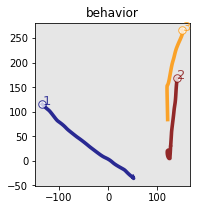

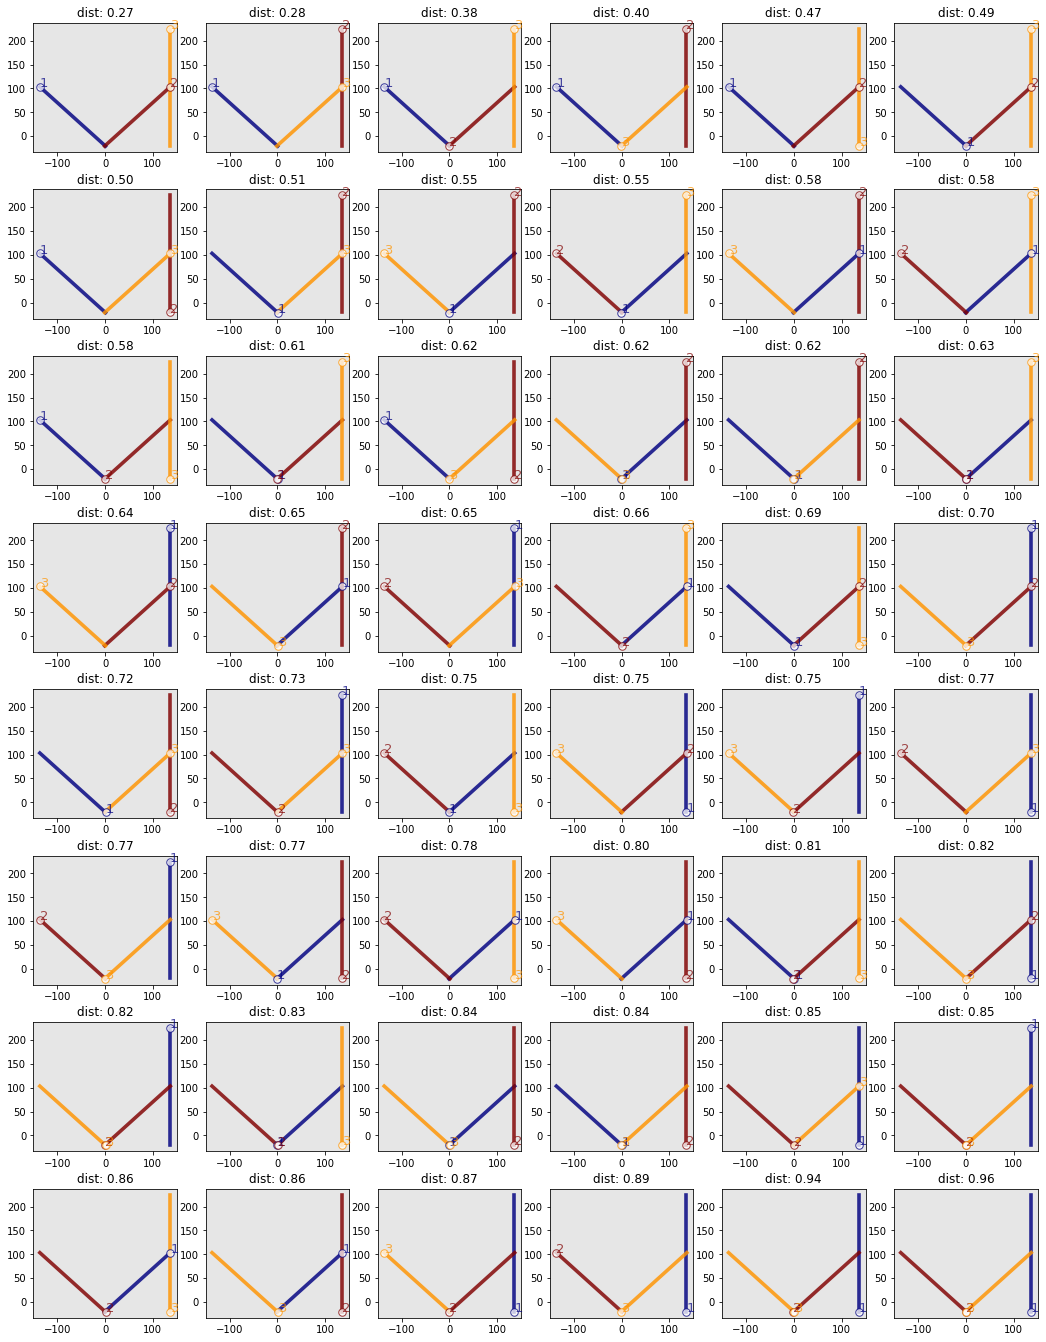

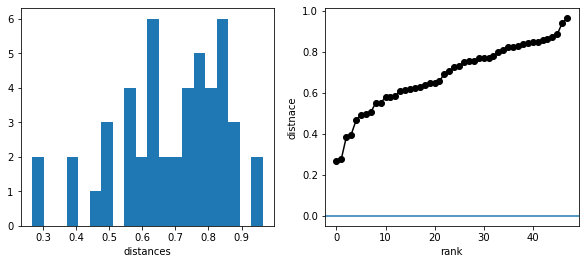

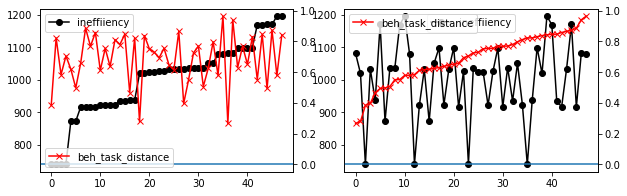

In [125]:
from pythonlib.drawmodel.efficiencycost import rank_beh_out_of_all_possible_sequences
rank, S = rank_beh_out_of_all_possible_sequences(strokes_beh, strokes_task, 
                                                 return_chosen_task_strokes=True, 
                                                 plot_rank_distribution=True,
                                                 plots=True)
